# 1. Spam Detector

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
import pandas as pd 
import numpy as np 

data = pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/spambase.data").values

In [13]:
data

array([[2.100e-01, 2.800e-01, 5.000e-01, ..., 1.010e+02, 1.028e+03,
        1.000e+00],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 4.850e+02, 2.259e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+01, 1.910e+02,
        1.000e+00],
       ...,
       [3.000e-01, 0.000e+00, 3.000e-01, ..., 6.000e+00, 1.180e+02,
        0.000e+00],
       [9.600e-01, 0.000e+00, 0.000e+00, ..., 5.000e+00, 7.800e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 6.500e-01, ..., 5.000e+00, 4.000e+01,
        0.000e+00]])

In [14]:
np.random.shuffle(data)

In [15]:
X = data[:, :-1]
Y = data[:, -1]

In [19]:
Xtrain = X[:-100,]
Ytrain = Y[:-100,]
Xtest = X[-100:,]
Ytest = Y[-100:,]

In [20]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Classification rate for NB:", model.score(Xtest, Ytest))

Classification rate for NB: 0.85


In [21]:
from sklearn.ensemble import AdaBoostClassifier 
model = AdaBoostClassifier()
model.fit(Xtrain, Ytrain)
print("Classification rate for AdaBoost:", model.score(Xtest, Ytest))

Classification rate for AdaBoost: 0.94


# SMS Spam

In [23]:
sms = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [24]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
!pip install wordcloud

     |████████████████████████████████| 216 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.4 MB 529 kB/s eta 0:00:01
     |████████████████████████████████| 67 kB 5.6 MB/s  eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 60 kB 2.4 MB/s eta 0:00:01
Using legacy setup.py install for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud ... done


In [27]:
sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [28]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
len(sms)

5572

In [31]:
sms.columns=['labels', 'data']

In [32]:
sms.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
sms['binary_labels'] = sms['labels'].map({'ham':0, 'spam':1})

In [34]:
sms.head()

,labels,data,binary_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [39]:
count_vectorizer = CountVectorizer(decode_error = 'ignore')

In [41]:
X = count_vectorizer.fit_transform(sms['data'])

In [42]:
y = sms['binary_labels']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
model = MultinomialNB()

In [45]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
print(model.score(X_train, y_train))

0.9932690150325331


In [47]:
print(model.score(X_test, y_test))

0.9802690582959641


In [48]:
X

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [51]:
X[:100, :5]

<100x5 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [56]:
X[:, 0].toarray()

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [63]:
! pip install wordcloud --user

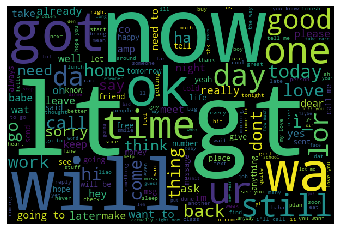

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def visualize(label): 
    words = ''
    for msg in sms[sms['labels']==label]['data']:
        msg = msg.lower()
        words += msg + ''
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
visualize('ham')

In [65]:
!pip3 install wordcloud

In [67]:
import sys

In [68]:
print(sys.executable)

/Users/AnthonyW/opt/anaconda3/bin/python


In [70]:
!{sys.executable} -m pip install wordcloud

     |████████████████████████████████| 163kB 3.1MB/s eta 0:00:01


In [75]:
sms['predictions'] = model.predict(X)

In [78]:
sneaky_spam = sms[(sms['predictions']==0) & (sms['binary_labels']==1)]['data']

In [79]:
sneaky_spam

5       FreeMsg Hey there darling it's been 3 week's n...
68      Did you hear about the new \Divorce Barbie\"? ...
750     Do you realize that in about 40 years, we'll h...
787     Ever thought about living a good life with a p...
868     Hello. We need some posh birds and chaps to us...
1268    Can U get 2 phone NOW? I wanna chat 2 set up m...
1874    Would you like to see my XXX pics they are so ...
1939    More people are dogging in your area now. Call...
2246    Hi ya babe x u 4goten bout me?' scammers getti...
2401    Babe: U want me dont u baby! Im nasty and have...
2574    Your next amazing xxx PICSFREE1 video will be ...
2662    Hello darling how are you today? I would love ...
2773    How come it takes so little time for a child w...
2821    ROMCAPspam Everyone around should be respondin...
2963    Do you ever notice that when you're driving, a...
3358    Sorry I missed your call let's talk when you h...
3417    LIFE has never been this much fun and great un...
3458    Not he